# Proyecto 03 - Procesamiento del Lenguaje Natural

## Dataset: The Multilingual Amazon Reviews Corpus

**Recuerda descargar el dataset de [aquí](https://github.com/kang205/SASRec). Es un archivo .zip que contiene tres documentos. Más información sobre el dataset [aquí](https://registry.opendata.aws/amazon-reviews-ml/). Es importante que tengas en cuenta la [licencia](https://docs.opendata.aws/amazon-reviews-ml/license.txt) de este dataset.**

### Exploración de datos y Procesamiento del Lenguaje Natural

Dedícale un buen tiempo a hacer un Análisis Exploratorio de Datos. Considera que hasta que no hayas aplicado las herramientas de Procesamiento del Lenguaje Natural vistas, será difícil completar este análisis. Elige preguntas que creas que puedas responder con este dataset. Por ejemplo, ¿qué palabras están asociadas a calificaciones positivas y qué palabras a calificaciones negativas?

### Machine Learning

Implementa un modelo que, dada la crítica de un producto, asigne la cantidad de estrellas correspondiente. **Para pensar**: ¿es un problema de Clasificación o de Regresión?

1. Haz todas las transformaciones de datos que consideres necesarias. Justifica.
1. Evalúa de forma apropiada sus resultados. Justifica la métrica elegida.
1. Elige un modelo benchmark y compara tus resultados con este modelo.
1. Optimiza los hiperparámetros de tu modelo.
1. Intenta responder la pregunta: ¿Qué información está usando el modelo para predecir?

**Recomendación:** si no te resulta conveniente trabajar en español con NLTK, te recomendamos que explores la librería [spaCy](https://spacy.io/).

### Para pensar, investigar y, opcionalmente, implementar
1. ¿Valdrá la pena convertir el problema de Machine Learning en un problema binario? Es decir, asignar únicamente las etiquetas Positiva y Negativa a cada crítica y hacer un modelo que, en lugar de predecir las estrellas, prediga esa etiqueta. Pensar en qué situación puede ser útil. ¿Esperas que el desempeño sea mejor o peor?
1. ¿Hay algo que te gustaría investigar o probar?

### **¡Tómate tiempo para investigar y leer mucho!**

*** Este notebook se puede acceder en github: DS_Proyecto_03_NLP.ipynb ***
---
https://github.com/santyres/Acamica-DS

In [ ]:
import pandas as pd
import itertools
from random import randint
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
sns.set()

import spacy

from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

In [ ]:
#Instalar paquete de lenguaje español para la librería spacy
!python -m spacy download es_core_news_md

In [2]:
#Importar paquete de lenguaje en español para la librería spacy
import es_core_news_md
nlp = es_core_news_md.load()
# nlp = spacy.load("es_core_news_md", exclude=["ner"])

In [8]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#Cargar datos de entrenamiento
df = pd.read_json("dataset_es_train.json", lines=True)
df.head()

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category
0,es_0491108,product_es_0296024,reviewer_es_0999081,1,Nada bueno se me fue ka pantalla en menos de 8...,television Nevir,es,electronics
1,es_0869872,product_es_0922286,reviewer_es_0216771,1,"Horrible, nos tuvimos que comprar otro porque ...",Dinero tirado a la basura con esta compra,es,electronics
2,es_0811721,product_es_0474543,reviewer_es_0929213,1,Te obligan a comprar dos unidades y te llega s...,solo llega una unidad cuando te obligan a comp...,es,drugstore
3,es_0359921,product_es_0656090,reviewer_es_0224702,1,"No entro en descalificar al vendedor, solo pue...",PRODUCTO NO RECIBIDO.,es,wireless
4,es_0068940,product_es_0662544,reviewer_es_0224827,1,Llega tarde y co la talla equivocada,Devuelto,es,shoes


#// Exploración de datos //

In [ ]:
#Los datos estan balanceados?
df.stars.value_counts()

5    40000
4    40000
3    40000
2    40000
1    40000
Name: stars, dtype: int64

Nota: El dataset está convenientemente balanceado y no tiene valores atípicos en las etiquetas!

In [ ]:
#Cantidad de revisiones por idioma
df.language.value_counts()

es    200000
Name: language, dtype: int64

In [ ]:
#Cantidad de productos
len(df.product_id.unique())

150938

In [ ]:
#Valores duplicados?
df.duplicated().sum()

0

In [ ]:
#Visualizar registros de manera aleatoria.
reg = randint(0, 200000)
print(df.review_body[reg])
print(df.review_title[reg])
print(df.product_category[reg])
print(df.stars[reg])


Imposible de utilizar ya que ha desaparecido la aplicación. No se puede poner ni día,ni hora...
No comprar,la aplicación ha desaparecido.
wireless
1


In [ ]:
#Cuántas categorías tiene el Dataset?
print(f"Cantidad de categorías: {len(df.product_category.value_counts())}\n")
df.product_category.value_counts()

Cantidad de categorías: 30



home                        26962
wireless                    25886
toy                         13647
sports                      13189
pc                          11191
home_improvement            10879
electronics                 10385
beauty                       7337
automotive                   7143
kitchen                      6695
apparel                      5737
drugstore                    5513
book                         5264
furniture                    5229
baby_product                 4881
office_product               4771
lawn_and_garden              4237
other                        3937
pet_products                 3713
personal_care_appliances     3573
luggage                      3328
camera                       3029
shoes                        2754
digital_ebook_purchase       1843
video_games                  1733
jewelry                      1598
musical_instruments          1530
watch                        1490
industrial_supplies          1482
grocery       

Nota: Aunque el dataset esta balanceado por cantidad de estrellas (label/target), desde el punto de vista de la cantidad de categorías, podríamos decir que no está balanceado.

<BarContainer object of 30 artists>

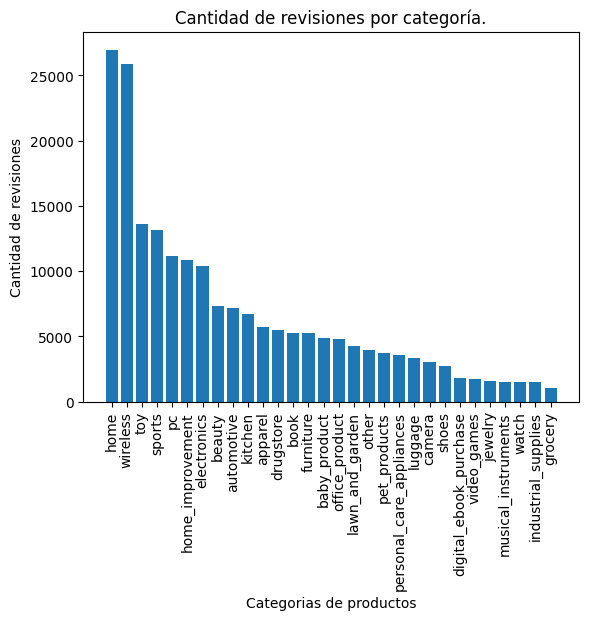

In [ ]:
#Cantidad de revisiones por categoría
import matplotlib.pyplot as plt
n_by_category = df.groupby("product_category")["product_category"].count()
# n_by_category.reset_index(inplace=True)
n_by_category_ = pd.DataFrame(n_by_category.sort_values(ascending=False))
n_by_category_.rename(columns={"product_category":"cantidad"}, inplace=True)
n_by_category_.reset_index(inplace = True)
n_by_category_

# plt.hist(n_by_category,data)
plt.title("Cantidad de revisiones por categoría.")
plt.xlabel("Categorias de productos")
plt.ylabel("Cantidad de revisiones")
plt.style.use('default')
plt.xticks(rotation = 90)
plt.bar(x="product_category", height="cantidad",data=n_by_category_)

In [ ]:
#Hay datos faltantes?
df.isnull().sum()

review_id           0
product_id          0
reviewer_id         0
stars               0
review_body         0
review_title        0
language            0
product_category    0
dtype: int64

Pregunta: Cuáles categorías de productos podríamos decir que tienen buena reputación y cuáles categorías mala reputación?

Se analizará el "sentimiento general por categoría" para entender cuales categorías se asocian con sentimiento positivo o negativo.  Se asume que puntajes de 1 y 2 estrellas son "negativos", puntajes de 3 son "neutros" y puntajes de 4 y 5 son "positivos".  Se dejará por fuera del análisis el puntaje de 3 estrellas, ya que asumimos que no aporta a la decisión sobre si una revisión es positiva o negativa.

In [ ]:
#Cantidad de buenos puntajes por categoria
best_cat = df[(df.stars == 5) | (df.stars == 4)].groupby("product_category", sort = True)["product_category"].count()
best_cat

product_category
apparel                      2059
automotive                   2754
baby_product                 2030
beauty                       2725
book                         2711
camera                       1325
digital_ebook_purchase        900
drugstore                    2207
electronics                  3893
furniture                    2148
grocery                       451
home                        10552
home_improvement             4542
industrial_supplies           610
jewelry                       580
kitchen                      2761
lawn_and_garden              1437
luggage                      1643
musical_instruments           724
office_product               2022
other                        1657
pc                           4834
personal_care_appliances     1463
pet_products                 1441
shoes                        1194
sports                       5372
toy                          5466
video_games                   768
watch                         6

In [ ]:
#Cantidad de malos puntajes por categoria
worse_cat = df[(df.stars == 1) | (df.stars == 2)].groupby("product_category", sort = True)["product_category"].count()
worse_cat

product_category
apparel                      2478
automotive                   2904
baby_product                 1795
beauty                       3073
book                         1555
camera                       1100
digital_ebook_purchase        500
drugstore                    2205
electronics                  4590
furniture                    1952
grocery                       378
home                        10933
home_improvement             4149
industrial_supplies           534
jewelry                       660
kitchen                      2653
lawn_and_garden              2004
luggage                      1033
musical_instruments           507
office_product               1778
other                        1494
pc                           4369
personal_care_appliances     1426
pet_products                 1501
shoes                        1008
sports                       4989
toy                          5216
video_games                   660
watch                         5

In [ ]:
#Sentimiento general por categorias
puntaje_productos = best_cat.to_frame(name="puntajes_buenos")
puntaje_productos["puntajes_malos"] = worse_cat.to_frame(name="puntajes_malos").puntajes_malos
#Restar puntajes buenos menos puntajes malos, los valores negativos en el resultado indicarán que los puntajes negativos superan a los positivos
puntaje_productos["buenos_menos_malos"] = puntaje_productos.puntajes_buenos - puntaje_productos.puntajes_malos
puntaje_productos["sentimiento"] = puntaje_productos["buenos_menos_malos"].map(lambda x : "negativo" if (x < 0) else "positivo",na_action=None)
puntaje_productos[["buenos_menos_malos","sentimiento"]].sort_values(by=['buenos_menos_malos'])

,buenos_menos_malos,sentimiento
product_category,,
wireless,-2845,negativo
electronics,-697,negativo
lawn_and_garden,-567,negativo
apparel,-419,negativo
home,-381,negativo
beauty,-348,negativo
automotive,-150,negativo
jewelry,-80,negativo
pet_products,-60,negativo


Respuesta a la pregunta planteada: Basados en la cantidad de reviews positivas y negativas por categoría de producto, podemos concluir que hay categorías de producto que gozan de buena reputación como book, luggage (equipaje) y pc (computación), entre otras, y que otras categorías gozan de mala reputación como wireless, electronics y lawn_and_garden (cesped y jardín).

In [ ]:
#Cantidad categorias con sentimiento general positivo y negativo
puntaje_pruductos.sentimiento.value_counts()

positivo    21
negativo     9
Name: sentimiento, dtype: int64

Nota: Analizando los sentimientos por categoría, podemos afirmar que en general hay mas categorías con reviews positivos que negativos.

#// Análisis de frecuencias y normalizacion //

Realizaremos la limpieza de datos para eliminar caracteres especiales y números, pasar a minúsculas y llevar las palabras a su raiz (lemma) para reducir el conjunto de palabras y facilitar el procesamiento de las mismas.

In [ ]:
#Visualizar registros de manera aleatoria.
reg = randint(0, 200000)
print(df.review_body[reg])
print(df.review_title[reg])
print(df.product_category[reg])
print(df.stars[reg])
print(f"reg: {reg}")

Buena menea de darle la fruta natural exprimida a los bebes si estos no la comen de la cuchara como es el caso de mi hijo. Fácil de limpiar.
Buena compra
baby_product
4
reg: 143199


In [ ]:
# import nltk
# nltk.download('omw')
# !wget http://compling.hss.ntu.edu.sg/omw/wns/spa.zip
# !mkdir ~/nltk_data/corpora/omw/spa
# !unzip -p spa.zip mcr/wn-data-spa.tab > ~/nltk_data/corpora/omw/spa/wn-data-spa.tab
# from nltk.corpus import wordnet
# wordnet.synsets('bank')[0].lemma_names('spa')


Probar lemmatizacion en español con NLTK

In [ ]:
#probar lematización en español con un review

#obtiene una letra según el pos que corresponda a una palabra dada. (de acuerdo con el requerimiento del metodo lemmatize)
def get_wordnet_pos(word):
  """Map POS tag to first character lemmatize() accepts"""
  tag = nltk.pos_tag([word])[0][1][0].upper()
  tag_dict = {"J": wordnet.ADJ,
              "N": wordnet.NOUN,
              "V": wordnet.VERB,
              "R": wordnet.ADV}

  return tag_dict.get(tag, wordnet.NOUN)

#instancia lematizador
wordnet_lemmatizer = WordNetLemmatizer()
#obtiene un review
frase = df.review_body[45208]
frase_tokens = nltk.word_tokenize(frase)
#obtiene la lista de palabras y los tipos de tag correspondiente a cada una de ellas (pos tag)
frase_lemma = [wordnet_lemmatizer.lemmatize(w, get_wordnet_pos(w)) for w in nltk.word_tokenize(frase)]
tipo_palabra = [get_wordnet_pos(w) for w in nltk.word_tokenize(frase)]

#imprime palabra, tipo y lemma
print(f"frase: {frase} \n")
print("{0:20}{1:20}{2:20}".format("Palabra:","Tipo:","Lemma:"))
for i in range(len(frase_tokens)):
    print ("{0:20}{1:20}{2:20}".format(frase_tokens[i],tipo_palabra[i],frase_lemma[i]))


frase: sigo de pruebas, el plazo de entrega ha sido larguísimo, 12 dias mas tarde de la fecha dada por amazon, estuve a punto de anular el pedido. 

Palabra:            Tipo:               Lemma:              
sigo                n                   sigo                
de                  n                   de                  
pruebas             n                   pruebas             
,                   n                   ,                   
el                  n                   el                  
plazo               n                   plazo               
de                  n                   de                  
entrega             n                   entrega             
ha                  n                   ha                  
sido                n                   sido                
larguísimo          n                   larguísimo          
,                   n                   ,                   
12                  n                   12                

Nota: con el ejercicio anterior, se concluye que la librería NLTK no obtiene correctamente las raices (lemmas) de las palabras en español. Por este motivo haremos el trabajo con la librería Spacy.

Probar lematización en español con Spacy

In [ ]:
#probar lematización en español con un review
frase = df.review_body[45208]

#Inicializa el objeto doc
doc = nlp(frase)

#imprime palabra, tipo y lemma
print("{0:20}{1:20}{2:20}".format("Palabra:","Tipo:","Lemma:"))
for token in doc:
    print ("{0:20}{1:20}{2:20}".format(token.text,token.pos_,token.lemma_))

Palabra:            Tipo:               Lemma:              
sigo                VERB                seguir              
de                  ADP                 de                  
pruebas             NOUN                prueba              
,                   PUNCT               ,                   
el                  DET                 el                  
plazo               NOUN                plazo               
de                  ADP                 de                  
entrega             NOUN                entregar            
ha                  AUX                 haber               
sido                AUX                 ser                 
larguísimo          ADJ                 larguísimo          
,                   PUNCT               ,                   
12                  NUM                 12                  
dias                NOUN                dias                
mas                 PROPN               mas                 
tarde               ADV 

Nota: Se comprueba que Spacy realiza bien el lemmatizado en español, procederemos a aplicarlo en el corpus de reviews.

Análisis de frecuencia de palabras ->

Palabras asociadas a calificaciones positivas:

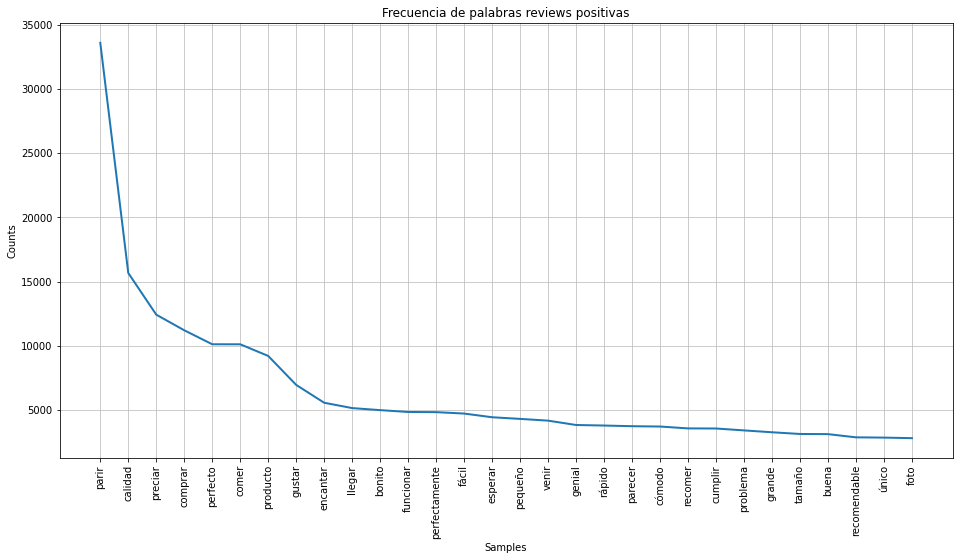

In [ ]:
#Extraer palabras mas comunes para reviews positivas, aplicar lemmatizado y limpieza (stopwords)

# stopwords = nltk.corpus.stopwords.words('spanish')
stopwords = spacy.lang.es.stop_words.STOP_WORDS

#filtra calificaciones positivas
reviews_positivas = df[(df.stars == 4) | (df.stars == 5)]

palabras_reviews_positivas = []
lemmas = []

#Realizar tokenizado para cada review y extraer lemmas descartando stopwords, se optimiza el pipeline de spacy para mejorar el performance.
for doc in nlp.pipe(list(reviews_positivas.review_body), disable=["tagger", "parser","ner","textcat","custom"]): #recorre reviews
  #recorre los tokens para extraer lemmas de las palabras
  lemma = [token.lemma_.lower() for token in doc if token.lemma_ not in stopwords #elimina stopwords
                                                  if token.lemma_.isalpha() #elimina numeros y puntuación
                                                  if len(token.lemma_) > 3] #elimina palabras con menos de 3 caracteres
  lemmas.append(lemma)

palabras_reviews_positivas = list(itertools.chain(*lemmas))

#calcula la frecuencia de aparición de cada palabra
freq = nltk.FreqDist(palabras_reviews_positivas)

df_palabras_reviews_positivas = pd.DataFrame(list(freq.items()), columns = ["palabras","frecuencia"])
df_palabras_reviews_positivas.sort_values("frecuencia",ascending=False,inplace=True)
# print(df_palabras_reviews_positivas.head(50))
plt.figure(figsize=(16, 8))
freq.plot(30, cumulative=False, title="Frecuencia de palabras reviews positivas")

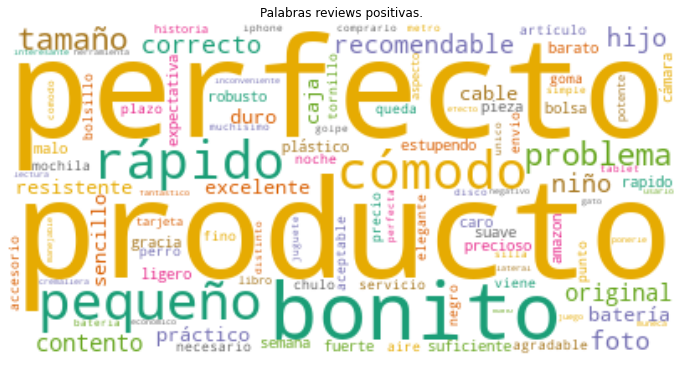

In [ ]:
#imprimir nube de palabras para reviews positivas
from wordcloud import WordCloud
wc = WordCloud(stopwords=stopwords, background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42)

plt.rcParams['figure.figsize'] = [12,8]

# Create subplots for each anio
wc.generate(' '.join(list(df_palabras_reviews_positivas.palabras)))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.title("Palabras reviews positivas.")
plt.show()

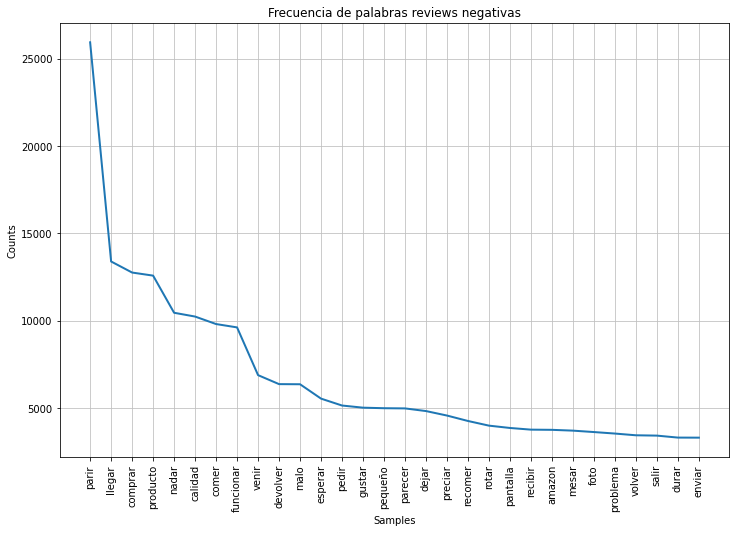

In [ ]:
#Extraer palabras mas comunes para reviews negativas, aplicar lemmatizado y limpieza (stopwords)

stopwords = spacy.lang.es.stop_words.STOP_WORDS

#filtra calificaciones positivas
reviews_negativas = df[(df.stars == 1) | (df.stars == 2)]

palabras_reviews_negativas = []
lemmas = []

#Realizar tokenizado para cada review y extraer lemmas descartando stopwords, se optimiza el pipeline de spacy para mejorar el performance.
for doc in nlp.pipe(list(reviews_negativas.review_body), disable=["tagger", "parser","ner","textcat","custom"]): #recorre reviews
  #recorre los tokens para extraer lemmas de las palabras
  lemma = [token.lemma_.lower() for token in doc if token.lemma_ not in stopwords #elimina stopwords
                                                 if token.lemma_.isalpha() #elimina numeros y puntuación
                                                 if len(token.lemma_) > 3] #elimina palabras con menos de 3 caracteres
  lemmas.append(lemma)

palabras_reviews_negativas = list(itertools.chain(*lemmas))

#calcula la frecuencia de aparición de cada palabra
freq = nltk.FreqDist(palabras_reviews_negativas)

palabras_reviews_negativas = pd.DataFrame(list(freq.items()), columns = ["palabras","frecuencia"])
palabras_reviews_negativas.sort_values("frecuencia",ascending=False,inplace=True)
# print(palabras_reviews_negativas.head(50))
freq.plot(30, cumulative=False, title = "Frecuencia de palabras reviews negativas")

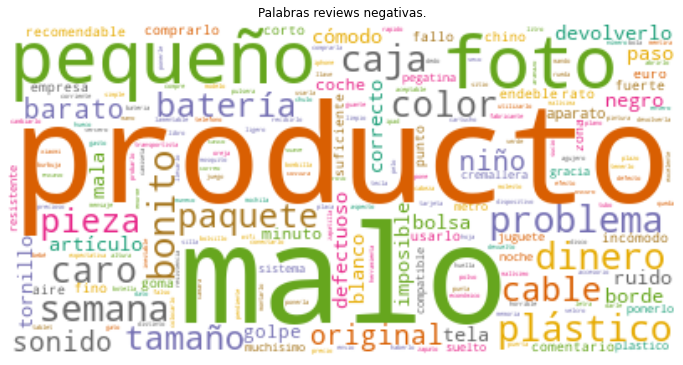

In [ ]:
#imprimir nube de palabras para reviews negativas
wc.generate(' '.join(list(palabras_reviews_negativas.palabras)))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.title("Palabras reviews negativas.")
plt.show()

Nota: Se buscaron las palabras mas frecuentes para revisiones positivas y negativas, algunas palabras son relevantes para los dos tipos de revisiones, por ejemplo: comprar, producto, calidad, funcionar, gustar, problema.  Esto podría ser un inconveniente para que el clasificador pueda generalizar.

In [ ]:
#Otra forma usando nltk peron sin obtener los lemmas de las palabras
# stopwords = spacy.lang.es.stop_words.STOP_WORDS

#palabras mas comunes para reviews negativas
# palabras_reviews_negativas = []

# reviews_negativas = df[(df.stars == 1) | (df.stars == 2)]

# for r in reviews_negativas.review_body:
#   review = r.lower()
#   review_wt = nltk.tokenize.RegexpTokenizer("[\w]+").tokenize(review)
#   review_wt_sin_sw = [word for word in review_wt if word not in stopwords]
#   review_wt_sin_sw_filtro = [palabra for palabra in review_wt_sin_sw if len(palabra)>3]
#   palabras_reviews_negativas.append(review_wt_sin_sw_filtro)

# palabras_reviews_negativas = list(itertools.chain(*palabras_reviews_negativas))
# freq = nltk.FreqDist(palabras_reviews_negativas)

# df_palabras_reviews_negativas = pd.DataFrame(list(freq.items()), columns = ["palabras","frecuencia"])
# df_palabras_reviews_negativas.sort_values("frecuencia",ascending=False,inplace=True)
# df_palabras_reviews_negativas.head(30)

#// Normalización y  Vectorización //

In [4]:
 #Llevar las palabras de cada review a su respectiva raiz (lemma), hacer limpieza (stopwords, puntuación, números y caracteres especiales)

stopwords = nltk.corpus.stopwords.words('spanish')
# stopwords = spacy.lang.es.stop_words.STOP_WORDS

palabras_lemma = []

#Realizar tokenizado y lemmatizado para cada review, se optimiza el pipeline de spacy para mejorar el performance.
for doc in nlp.pipe(list(df.review_body), disable=["tagger", "parser","ner","textcat","custom"]): #recorre reviews
  #recorre los tokens para extraer lemmas de las palabras
  lemma = [token.lemma_.lower() for token in doc if token.lemma_ not in stopwords #elimina stopwords
                                                 if token.lemma_.isalpha() #elimina numeros y puntuación
                                                 if len(token.lemma_) > 3] #elimina palabras con menos de 3 caracteres
  lemma = " ".join(lemma)
  palabras_lemma.append(lemma)

df["review_body_lemma"] = palabras_lemma
df[["review_body","review_body_lemma","stars"]].head()


,review_body,review_body_lemma,stars
0,Nada bueno se me fue ka pantalla en menos de 8...,nada bueno pantalla menos mesar haber recibir ...,1
1,"Horrible, nos tuvimos que comprar otro porque ...",horrible tener comprar saber inglés informátic...,1
2,Te obligan a comprar dos unidades y te llega s...,obligar comprar unidad llegar solo haber forma...,1
3,"No entro en descalificar al vendedor, solo pue...",entrar descalificar vendedor solo poder decir ...,1
4,Llega tarde y co la talla equivocada,llega tardar tallar equivocar,1


In [ ]:
#Vectorizar los reviews lemmatizados
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

# Usaremos solo las 2000 palabras con mas frecuencia en todo el corpus para generar los vectores, para optimizar la memoria
max_features=2000
vectorizer = CountVectorizer(max_features=max_features)

reviews = list(df.review_body_lemma.values)
stars = df.stars.values

X = vectorizer.fit_transform(reviews)
# # print(vectorizer.get_feature_names()[0:50])

x = X.toarray()
y = stars


In [ ]:
#Creamos los conjuntos de train y test para el entrenamiento del modelo
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)

#Modelos

Usaremos naive_bayes como modelo benchmark de referencia para el accuracy

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(xtrain,ytrain)
#imprime la exactitud o accuracy
print("acc : ", nb.score(xtest,ytest))

acc :  0.3676


Usaremos el **accuracy** como métrica de evaluación del modelo ya que nos enfocaremos al total de predicciones correctas realizadas sobre el total de muestras.  No es trascendental para nuestro problema enfocarnos en analizar los falsos positivos o los falsos negativos.  También cabe resaltar que estamos trabajando con etiquetas balanceadas.

Usaremos también la **matriz de confusión** para visualizar la cantidad de aciertos y errores que está teniendo nuestro modelo.

In [22]:
#método para generar la matriz de confusión
def confusion(ytest,y_pred):
    names=["1","2","3","4","5"]
    cm=confusion_matrix(ytest,y_pred)
    f,ax=plt.subplots(figsize=(5,5))
    sns.heatmap(cm,annot=True,linewidth=.5,linecolor="r",fmt=".0f",ax=ax)
    plt.xlabel("y_pred")
    plt.ylabel("y_true")
    ax.set_xticklabels(names)
    ax.set_yticklabels(names)
    plt.show()

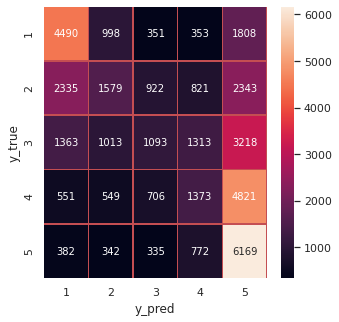

In [ ]:
y_pred = nb.predict(xtest)
confusion(ytest,y_pred)
#diagonales / total muestras: 14704 / 40000 = 0.3676 (accuracy)

Usaremos un  modelo mas robusto para validar si puede mejorar la clasificación: RandomForest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfmodel = RandomForestClassifier(random_state=42)
rfmodel.fit(xtrain,ytrain)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [ ]:
print("acc: ",rfmodel.score(xtest,ytest))

acc:  0.4422


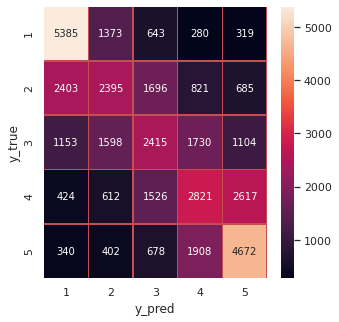

In [ ]:
y_pred = rfmodel.predict(xtest)
confusion(ytest,y_pred)

Nota: Obtuvimos una leve mejora en el modelo con respecto al modelo benchmark, veamos las palabras mas importantes que usó el modelo para clasificar.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


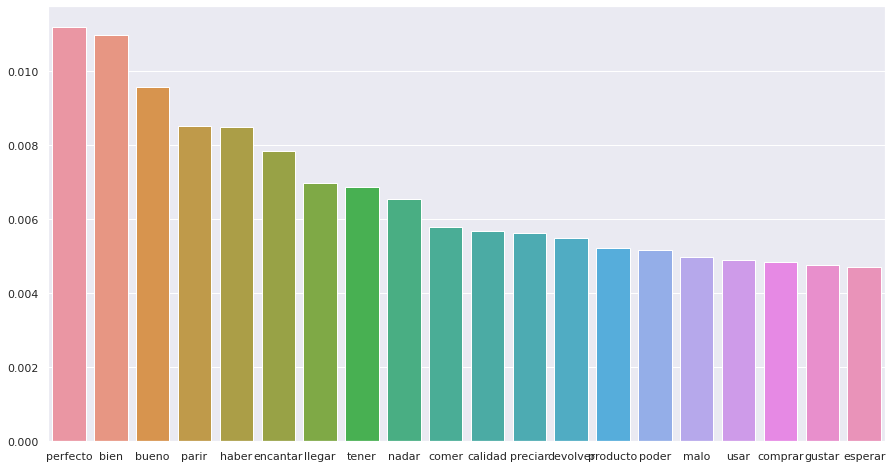

In [ ]:
# Le preguntamos la importancia de cada feature (cada palabra)
import numpy as np
importances = rfmodel.feature_importances_
# Tomamos la lista de palabras
palabras = vectorizer.get_feature_names()

# Ordenamos por importancia y tomamos las 20 primeras
indices = np.argsort(importances)[::-1] #obtiene los indices de los valores ordenados de menora a mayor, se invierte el orden para obtener los indices de los mayores valores primero
indices = indices[:20]
palabras_seleccionadas = [palabras[i] for i in indices] #recorre los indices y retorna las palabras
importancias_seleccionadas = importances[indices]

# Por ultimo graficamos
plt.figure(figsize = (15,8))
sns.barplot(palabras_seleccionadas, importancias_seleccionadas)
plt.show()

Hagamos optimización de los hiperparámetros del modelo randomforest.

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
# Grilla para Random Search
param_dist = {'bootstrap': [True, False],
              'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
              'max_features': ['auto', 'sqrt'],
              'min_samples_leaf': [1, 2, 4],
              'min_samples_split': [2, 5, 10],
              'n_estimators': [100, 150, 250, 350]
              }

rfmodel = RandomForestClassifier(random_state=42)

mejor_modelo = RandomizedSearchCV(rfmodel, param_dist, n_iter=100, random_state=42, cv=5)
mejor_modelo.fit(xtrain, ytrain)

print("Mejores parametros: "+str(mejor_modelo.best_params_))
print("Mejor Score: "+str(mejor_modelo.best_score_)+'\n')
#*** esta celda lleva una gran cantidad de tiempo para ejecutar dada la cantidad de features y datos que estamos procesando***

Salida del optimizador:

Mejores parametros: {'n_estimators': 350, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 50, 'bootstrap': True}
Mejor Score: 0.3912

In [ ]:
#Reentrenemos el modelo randomforest con los nuevos parámetros propuestos por el proceso de optimización
rfmodel = RandomForestClassifier(n_estimators = 350, min_samples_split = 2, min_samples_leaf = 2, max_depth = 50, random_state=42)
rfmodel.fit(xtrain,ytrain)
print("acc: ",rfmodel.score(xtest,ytest))
#tiempo de procesamiento: 12 minutos

acc:  0.450625


Nota: con el modelo randomforest optimizado no obtuvimos una mejora significativa.

Probaremos con un modelo SVM lineal para validar si puede mejorar la clasificación.

In [ ]:
from sklearn.svm import LinearSVC

svc = LinearSVC(C = 1)
svc.fit(xtrain,ytrain)
svc.score(xtest,ytest)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.4739

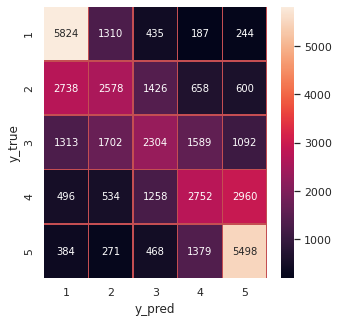

In [ ]:
y_pred = svc.predict(xtest)
confusion(ytest,y_pred)

Nota: con el modelo SVC ganamos unos puntos pero tampoco es significativo.

Probaremos con un modelo que esté mas preparado para un trabajo de clasificación multiclase.

In [ ]:
# from sklearn import svm
# rbf = svm.SVC(kernel='rbf', gamma=0.5, C=0.1).fit(xtrain, ytrain)
# print(rbf.score(xtest,ytest))
# y_pred = rbf.predict(xtest)
# confusion(ytest,y_pred)

Nota: El modelo programado en la celda anterior, tomó demasiado tiempo y copó la memoria disponible del sistema.  No lo podremos considerar, hasta que tengamos los recursos de cómputo necesarios.

In [ ]:
#otra opción:
# poly = svm.SVC(kernel='poly', degree=3, C=1).fit(X_train, y_train)
# https://www.baeldung.com/cs/svm-multiclass-classification

#// Otras alternativas //

Dado que no hemos logrado un modelo que tenga una exactitud aceptable, evaluaremos nuevas alternativas:

1. Cambiar el método de vectorización por tf-idf para minimizar la importancia de los términos comunes que podrían "opacar" las frecuencias de términos más raros pero más interesantes.  Con el fin de volver a ponderar las entidades de recuento en valores de punto flotante adecuados para el uso por un clasificador es muy común utilizar la transformación tf-idf.

In [15]:
#Vectorizar los reviews lemmatizados usando tf-idf
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# Usaremos solo las 2000 palabras con mas frecuencia en todo el corpus para generar los vectores, para optimizar la memoria
max_features=2000
vectorizer = TfidfVectorizer(max_features=max_features)

reviews = list(df.review_body_lemma.values)
stars = df.stars.values

X = vectorizer.fit_transform(reviews)
# # print(vectorizer.get_feature_names()[0:50])

x = X.toarray()
y = stars

In [ ]:
#volvemos a entrenar los modelos con los nuevos features vectorizados
from sklearn.ensemble import RandomForestClassifier

xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)

rfmodel = RandomForestClassifier(n_estimators = 350, min_samples_split = 2, min_samples_leaf = 2, max_depth = 50, random_state=42)
rfmodel.fit(xtrain,ytrain)
print("acc: ",rfmodel.score(xtest,ytest))


acc:  0.44925


In [ ]:
from sklearn.svm import LinearSVC
svc = LinearSVC(C = 1)
svc.fit(xtrain,ytrain)
svc.score(xtest,ytest)

0.4759

In [ ]:
rfmodel = RandomForestClassifier(random_state=42)
rfmodel.fit(xtrain,ytrain)
print("acc: ",rfmodel.score(xtest,ytest))


acc:  0.451625


Nota: No obtuvimos mejoras en la precisión de los modelos con la nueva técnica de vectorización.

2. Convertir el problema de clasificación multiclase en un problema de clasificación binaria, reduciendo las estrellas a dos para simplificar la predicción a reviews positivas y negativas.  Probaremos de nuevo los modelos para ver si tenemos un mejor score.

In [5]:
#Crear un nuevo set de datos que no incluya las calificaciones neutras.
df2 = df[df.stars != 3]
df2.stars.value_counts()
#Crear una nueva columna con el sentimiento (1:positivo o 0:negativo) para redefinir la etiqueta para el modelo
df2["sentimiento"] = df2["stars"].map(lambda x : "0" if (x <= 2) else "1",na_action=None)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [6]:
#Vectorizar los reviews lemmatizados usando tf-idf
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# Usaremos solo las 2000 palabras con mas frecuencia en todo el corpus para generar los vectores, para optimizar la memoria
max_features=2000
vectorizer = TfidfVectorizer(max_features=max_features)

reviews = list(df2.review_body_lemma.values)
stars = df2.sentimiento.values

X = vectorizer.fit_transform(reviews)
# # print(vectorizer.get_feature_names()[0:50])

x = X.toarray()
y = stars

In [19]:
#volvemos a entrenar los modelos con los nuevos features vectorizados
from sklearn.ensemble import RandomForestClassifier

xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)

#randomforest
rfmodel = RandomForestClassifier(random_state=42)
rfmodel.fit(xtrain,ytrain)
print("acc: ",rfmodel.score(xtest,ytest))

acc:  0.84503125


In [20]:
#randomforest optimizado
rfmodel = RandomForestClassifier(n_estimators = 350, min_samples_split = 2, min_samples_leaf = 2, max_depth = 50, random_state=42)
rfmodel.fit(xtrain,ytrain)
print("acc: ",rfmodel.score(xtest,ytest))

acc:  0.827


In [21]:
#LinearSVC
from sklearn.svm import LinearSVC
svc = LinearSVC(C = 1)
svc.fit(xtrain,ytrain)
svc.score(xtest,ytest)

0.86196875

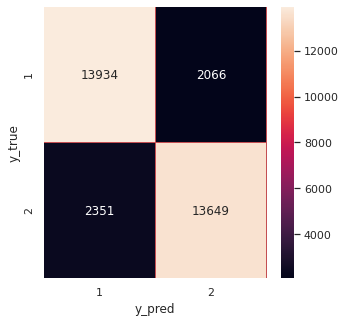

In [23]:
y_pred = svc.predict(xtest)
confusion(ytest,y_pred)

Bingo!! Logramos mejorar el score de los modelos convirtiendo nuestro problema en un problema binario.  El modelo mas viable hasta el momento y el que seleccionaríamos para producción sería LinearSVC.

/// En una próxima iteración ///

1. Se podría explorar la implementación de N-gramas para apuntarle a expresiones con mayor significado y evaluar si esto mejoraría el modelo.

2. Incluir los titulos de los reviews como feature o como texto adicional en el review para evaluar si reafirma o enfatiza el sentimiento.

3. Probar con ensambles para validar si mejora el proceso de inferencia.

4. Investigar si se puede cambiar la vectorización de las palabras por modelos de word embedding como word2vec para mejorar el performance en el entrenamiento de los modelos y ver si se obtienen alguna mejora en el score de los mismos.